In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [64]:
df=pd.read_csv("desktop/py_files/data/car data.csv")

## EDA

In [65]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [66]:
df.shape

(301, 9)

In [67]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [68]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [69]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## Visualizations

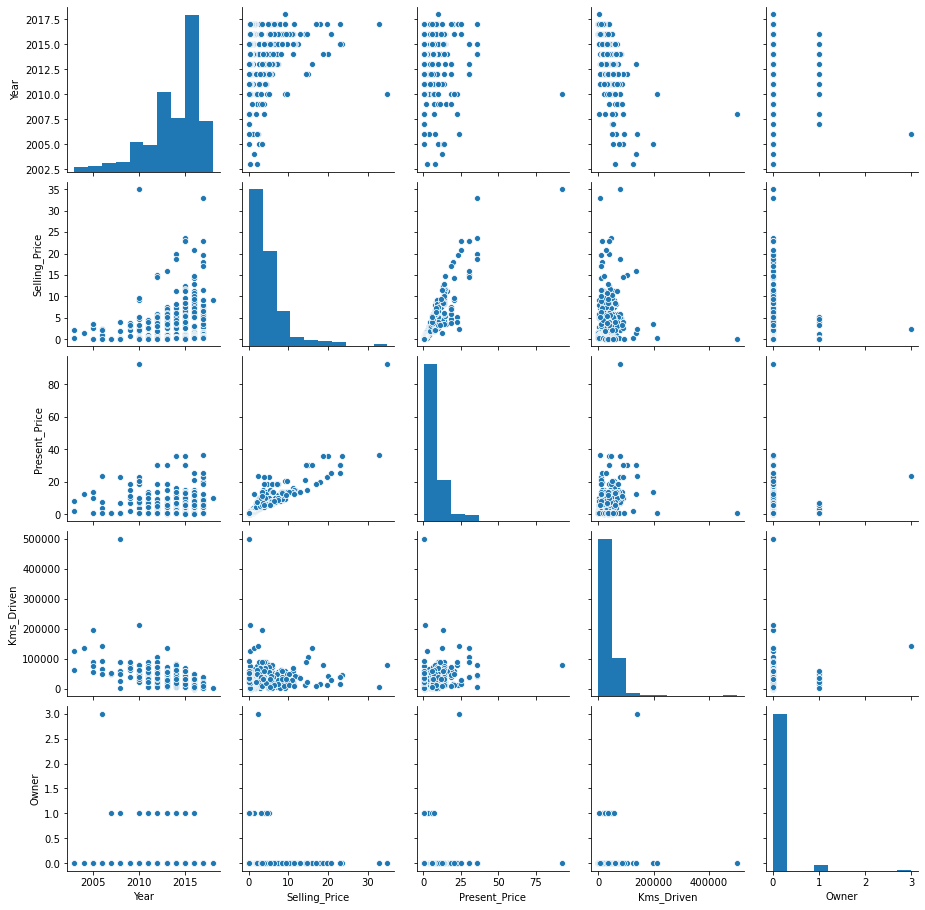

In [70]:
sns.pairplot(df)#checking the relations amongst the variables

<AxesSubplot:>

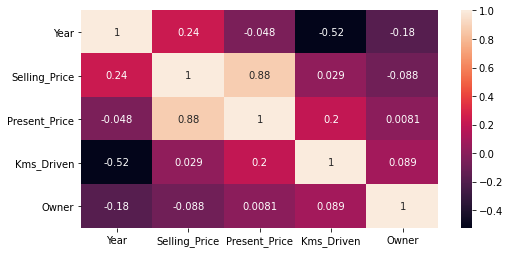

In [71]:
fig=plt.figure(figsize=(8,4))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='Selling_Price', ylabel='Present_Price'>

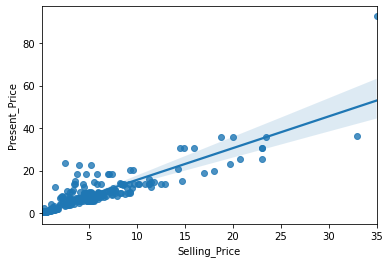

In [72]:
sns.regplot('Selling_Price','Present_Price',data=df)

In [73]:
#from the above heatmap and regplot we can see that sellingprice and presentprice are linearly related.
#so we will form our model using these two parameters

<AxesSubplot:xlabel='Year'>

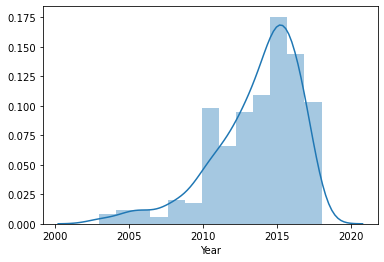

In [74]:
sns.distplot(df.Year)

In [75]:
#we can see that most of the cars are from the year 2015

In [76]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


<AxesSubplot:xlabel='Fuel_Type', ylabel='count'>

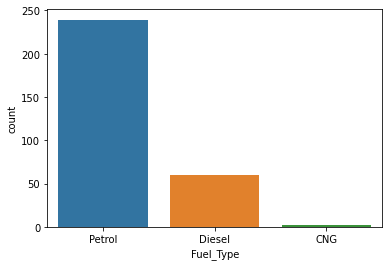

In [77]:
sns.countplot(df.Fuel_Type)#checking fuel type

<AxesSubplot:xlabel='Transmission', ylabel='count'>

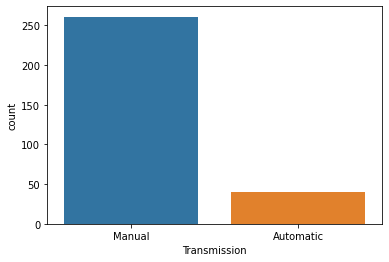

In [78]:
sns.countplot(df.Transmission)#checking transmission type

## machinelearningmodel

In [83]:
X=df.drop(["Car_Name","Year","Kms_Driven","Fuel_Type","Seller_Type","Transmission","Owner","Selling_Price"],axis="columns")
Y=df.Selling_Price

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)

In [86]:
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [95]:
reg.score(X_train,y_train)#accuracy of our model is 78%

0.7807091147775516

In [96]:
reg.predict([[8.59]])#predicting the selling price(testing data)

array([5.14021781])